# Lecture: Complex Network Analysis

Prof. Dr. Michael Gertz

Winter Semester 2021/22

## Assignment 1 - Graph Properties and Random Graphs

Students: Felix Hausberger, Nils Krehl, Patrick Günther

In [52]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
american_football_graph = nx.read_edgelist("data/american_football/american_football.edgelist", nodetype=int, create_using=nx.Graph())
print("KONECT american football graph:")
print("undirected, unweighted, no self-loops or multiple edges")
print(f"Nodes: {nx.number_of_nodes(american_football_graph)}")
print(f"Edges: {nx.number_of_edges(american_football_graph)}")

KONECT american football graph:
undirected, unweighted, no self-loops or multiple edges
Nodes: 115
Edges: 613


In [54]:
california_road_graph = nx.read_edgelist("data/california_road/california_road.edgelist", nodetype=int, create_using=nx.Graph())
print("SNAP california road graph:")
print("undirected, unweighted, no self-loops or multiple edges")
print(f"Nodes: {nx.number_of_nodes(california_road_graph)}")
print(f"Edges: {nx.number_of_edges(california_road_graph)}")

SNAP california road graph:
undirected, unweighted, no self-loops or multiple edges
Nodes: 1965206
Edges: 2766607


## 1.

In [55]:
def draw_ccdf(network, degree_distribution, loglog, format, lbl):
    ccdf = 1 - degree_distribution.cumsum() / degree_distribution.sum()
    plt.plot(range(len(ccdf)), ccdf, format, label=lbl)
    if loglog:
        plt.yscale('log')
        plt.xscale('log')
    # plt.ylim([0, 1.1])
    # plt.xlim([0, nx.number_of_nodes(network)])
    plt.ylabel('$P(k \geq k_x)$')
    plt.xlabel('$k_x$')
    plt.legend(loc="lower left")

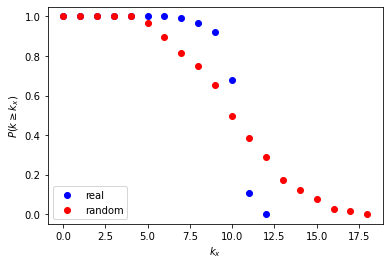

In [56]:
# Real network
degrees = np.array([val for (node, val) in american_football_graph.degree()])
degree_distribution = np.bincount(degrees)
draw_ccdf(american_football_graph, degree_distribution, False, 'bo', 'real');

# Averaged random network
degrees_total = np.array([])
for i in range(10):
    american_football_graph_random = nx.gnm_random_graph(nx.number_of_nodes(american_football_graph), nx.number_of_edges(american_football_graph))
    degrees = np.array([val for (node, val) in american_football_graph_random.degree()])
    degrees_total = np.append(degrees_total, degrees)
degree_distribution = np.bincount(degrees) / 10
draw_ccdf(american_football_graph_random, degree_distribution, False, 'ro', 'random');

plt.show()

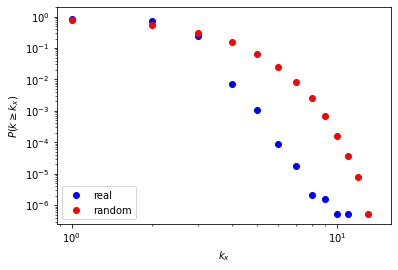

In [57]:
# Real network
degrees = np.array([val for (node, val) in california_road_graph.degree()])
degree_distribution = np.bincount(degrees)
draw_ccdf(california_road_graph, degree_distribution, True, 'bo', 'real');

# Averaged random network
degrees_total = np.array([])
for i in range(10):
    california_road_graph_random = nx.gnm_random_graph(nx.number_of_nodes(california_road_graph), nx.number_of_edges(california_road_graph))
    degrees = np.array([val for (node, val) in california_road_graph_random.degree()])
    degrees_total = np.append(degrees_total, degrees)
degree_distribution = np.bincount(degrees) / 10
draw_ccdf(california_road_graph_random, degree_distribution, True, 'ro', 'random');

plt.show()